# Spotify Recommender System

In [ ]:
import csv
import os
import re

import spotipy
from dotenv import load_dotenv
from spotipy.oauth2 import SpotifyClientCredentials

## Loading the Spotify Playlist CSV

In [ ]:
import pandas as pd

df = pd.read_csv("song_dataset.csv")
df.head()

artist_name       track_name      album_name  artist_pop  \
0         The Weeknd      Die For You         Starboy          95   
1  The Neighbourhood     Daddy Issues      Wiped Out!          82   
2         Conan Gray  People Watching       Superache          78   
3     Chase Atlantic          Into It  Chase Atlantic          78   
4     Chase Atlantic             Swim  Chase Atlantic          78   

                                              genres  track_pop  
0  ['canadian contemporary r&b', 'canadian pop', ...         92  
1  ['modern alternative rock', 'modern rock', 'po...         87  
2               ['bedroom pop', 'pop', 'pov: indie']         79  
3                                ['alternative r&b']         82  
4                                ['alternative r&b']         84

In [ ]:
# Getting audio features of playlist

def get_audio_features () :
  features = []
  for track in tracks:
    track_uri=track['track']['uri']
    features = features + (session.audio_features(track_uri))
  df = pd.DataFrame.from_dict(features)

  df["uri"] = track_uri
  return df

In [ ]:
features_df = get_audio_features()

In [ ]:
features_df.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.586   0.525    1    -7.163     0       0.0615        0.1110   
1         0.588   0.521   10    -9.461     1       0.0329        0.0678   
2         0.530   0.592    5    -7.281     1       0.0534        0.3810   
3         0.518   0.572   10    -6.706     0       0.0416        0.0503   
4         0.666   0.542    8    -6.429     1       0.0392        0.2700   

   instrumentalness  liveness  valence    tempo            type  \
0          0.000000    0.1340   0.5080  133.629  audio_features   
1          0.149000    0.1230   0.3370   85.012  audio_features   
2          0.000000    0.2940   0.5440  125.721  audio_features   
3          0.000024    0.1290   0.2910  130.053  audio_features   
4          0.000000    0.0765   0.0771  120.134  audio_features   

                       id                                   uri  \
0  2LBqCSwhJGcFQeTHMVGwy3  spotify:track:3QGsuHI8jO1Rx4JWLUh9jd   
1  5E30LdtzQTGqRvNd7l6kG5  spotify:track:3QGsuHI8jO1Rx4JWLUh9jd   
2  3TFoEJe5zNuHZStRboWPxg  spotify:track:3QGsuHI8jO1Rx4JWLUh9jd   
3  4HwDCXsMBC7SUdp2WT4MZP  spotify:track:3QGsuHI8jO1Rx4JWLUh9jd   
4  3M0lSi5WW79CXQamgSBIjx  spotify:track:3QGsuHI8jO1Rx4JWLUh9jd   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2LBqCSwhJGcF...   
1  https://api.spotify.com/v1/tracks/5E30LdtzQTGq...   
2  https://api.spotify.com/v1/tracks/3TFoEJe5zNuH...   
3  https://api.spotify.com/v1/tracks/4HwDCXsMBC7S...   
4  https://api.spotify.com/v1/tracks/3M0lSi5WW79C...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2LBq...       260253   
1  https://api.spotify.com/v1/audio-analysis/5E30...       260173   
2  https://api.spotify.com/v1/audio-analysis/3TFo...       158537   
3  https://api.spotify.com/v1/audio-analysis/4HwD...       196767   
4  https://api.spotify.com/v1/audio-analysis/3M0l...       228787   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

In [ ]:
new_song_dataset = pd.concat([features_df, df], axis=1)
new_song_dataset.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.586   0.525    1    -7.163     0       0.0615        0.1110   
1         0.588   0.521   10    -9.461     1       0.0329        0.0678   
2         0.530   0.592    5    -7.281     1       0.0534        0.3810   
3         0.518   0.572   10    -6.706     0       0.0416        0.0503   
4         0.666   0.542    8    -6.429     1       0.0392        0.2700   

   instrumentalness  liveness  valence  ...  \
0          0.000000    0.1340   0.5080  ...   
1          0.149000    0.1230   0.3370  ...   
2          0.000000    0.2940   0.5440  ...   
3          0.000024    0.1290   0.2910  ...   
4          0.000000    0.0765   0.0771  ...   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2LBqCSwhJGcF...   
1  https://api.spotify.com/v1/tracks/5E30LdtzQTGq...   
2  https://api.spotify.com/v1/tracks/3TFoEJe5zNuH...   
3  https://api.spotify.com/v1/tracks/4HwDCXsMBC7S...   
4  https://api.spotify.com/v1/tracks/3M0lSi5WW79C...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2LBq...      260253   
1  https://api.spotify.com/v1/audio-analysis/5E30...      260173   
2  https://api.spotify.com/v1/audio-analysis/3TFo...      158537   
3  https://api.spotify.com/v1/audio-analysis/4HwD...      196767   
4  https://api.spotify.com/v1/audio-analysis/3M0l...      228787   

  time_signature        artist_name       track_name      album_name  \
0              4         The Weeknd      Die For You         Starboy   
1              4  The Neighbourhood     Daddy Issues      Wiped Out!   
2              4         Conan Gray  People Watching       Superache   
3              4     Chase Atlantic          Into It  Chase Atlantic   
4              4     Chase Atlantic             Swim  Chase Atlantic   

   artist_pop                                             genres track_pop  
0          95  ['canadian contemporary r&b', 'canadian pop', ...        92  
1          82  ['modern alternative rock', 'modern rock', 'po...        87  
2          78               ['bedroom pop', 'pop', 'pov: indie']        79  
3          78                                ['alternative r&b']        82  
4          78                                ['alternative r&b']        84  

[5 rows x 24 columns]

In [ ]:
new_song_dataset.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
artist_name          object
track_name           object
album_name           object
artist_pop            int64
genres               object
track_pop             int64
dtype: object

In [ ]:
genre = df['genres'].value_counts()
genre

['canadian contemporary r&b', 'canadian pop', 'pop']                                                                   12
['modern alternative rock', 'modern rock', 'pop', 'pov: indie']                                                         7
['alternative r&b']                                                                                                     5
['r&b']                                                                                                                 5
['indie poptimism', 'pop']                                                                                              5
['lgbtq+ hip hop', 'neo soul']                                                                                          5
['pop', 'r&b', 'rap']                                                                                                   4
['art pop', 'pop']                                                                                                      4
['alt z', 'electropop', 

In [ ]:
df.value_counts()

artist_name                track_name                            album_name          artist_pop  genres                                                                                     track_pop
Aaryan Shah                Renegade                              Renegade            60          ['dark r&b']                                                                               61           1
SZA                        Good Days                             SOS                 88          ['pop', 'r&b', 'rap']                                                                      81           1
Summer Walker, Drake       Girls Need Love (with Drake) - Remix  Last Day Of Summer  95          ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap']                      82           1
Summer Walker              Deep                                  Last Day Of Summer  79          ['r&b', 'rap']                                                                             79   

In [ ]:
new_song_dataset.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.586   0.525    1    -7.163     0       0.0615        0.1110   
1         0.588   0.521   10    -9.461     1       0.0329        0.0678   
2         0.530   0.592    5    -7.281     1       0.0534        0.3810   
3         0.518   0.572   10    -6.706     0       0.0416        0.0503   
4         0.666   0.542    8    -6.429     1       0.0392        0.2700   

   instrumentalness  liveness  valence  ...  \
0          0.000000    0.1340   0.5080  ...   
1          0.149000    0.1230   0.3370  ...   
2          0.000000    0.2940   0.5440  ...   
3          0.000024    0.1290   0.2910  ...   
4          0.000000    0.0765   0.0771  ...   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2LBqCSwhJGcF...   
1  https://api.spotify.com/v1/tracks/5E30LdtzQTGq...   
2  https://api.spotify.com/v1/tracks/3TFoEJe5zNuH...   
3  https://api.spotify.com/v1/tracks/4HwDCXsMBC7S...   
4  https://api.spotify.com/v1/tracks/3M0lSi5WW79C...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2LBq...      260253   
1  https://api.spotify.com/v1/audio-analysis/5E30...      260173   
2  https://api.spotify.com/v1/audio-analysis/3TFo...      158537   
3  https://api.spotify.com/v1/audio-analysis/4HwD...      196767   
4  https://api.spotify.com/v1/audio-analysis/3M0l...      228787   

  time_signature        artist_name       track_name      album_name  \
0              4         The Weeknd      Die For You         Starboy   
1              4  The Neighbourhood     Daddy Issues      Wiped Out!   
2              4         Conan Gray  People Watching       Superache   
3              4     Chase Atlantic          Into It  Chase Atlantic   
4              4     Chase Atlantic             Swim  Chase Atlantic   

   artist_pop                                             genres track_pop  
0          95  ['canadian contemporary r&b', 'canadian pop', ...        92  
1          82  ['modern alternative rock', 'modern rock', 'po...        87  
2          78               ['bedroom pop', 'pop', 'pov: indie']        79  
3          78                                ['alternative r&b']        82  
4          78                                ['alternative r&b']        84  

[5 rows x 24 columns]

## Opening the Main Dataset

In [ ]:
%pip install textblob

Note: you may need to restart the kernel to use updated packages.Collecting textblob
                                              0.0/636.8 kB ? eta -:--:--
                                              10.2/636.8 kB ? eta -:--:--
     --                                    41.0/636.8 kB 495.5 kB/s eta 0:00:02
     ---                                   61.4/636.8 kB 469.7 kB/s eta 0:00:02
     ----                                  81.9/636.8 kB 573.4 kB/s eta 0:00:01
     ------                               112.6/636.8 kB 547.6 kB/s eta 0:00:01
     ------                               112.6/636.8 kB 547.6 kB/s eta 0:00:01
     ------                               122.9/636.8 kB 379.3 kB/s eta 0:00:02
     ---------                            163.8/636.8 kB 447.8 kB/s eta 0:00:02
     ---------                            174.1/636.8 kB 420.1 kB/s eta 0:00:02
     -----------                          204.8/636.8 kB 461.0 kB/s eta 0:00:01
     --------------                       256.0/

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import re

In [ ]:
spotify_df = pd.read_csv('processed_data.csv')
spotify_df.head()

Unnamed: 0.1  Unnamed: 0  pos    artist_name               track_uri  \
0             0           0    0  Missy Elliott  0UaMYEvWZi0ZqiDOoHU3YI   
1             1        7734   73  Missy Elliott  0UaMYEvWZi0ZqiDOoHU3YI   
2             2       14037   14  Missy Elliott  0UaMYEvWZi0ZqiDOoHU3YI   
3             3       21536   42  Missy Elliott  0UaMYEvWZi0ZqiDOoHU3YI   
4             4       24404    1  Missy Elliott  0UaMYEvWZi0ZqiDOoHU3YI   

                              artist_uri  \
0  spotify:artist:2wIVse2owClT7go1WT98tk   
1  spotify:artist:2wIVse2owClT7go1WT98tk   
2  spotify:artist:2wIVse2owClT7go1WT98tk   
3  spotify:artist:2wIVse2owClT7go1WT98tk   
4  spotify:artist:2wIVse2owClT7go1WT98tk   

                                   track_name  \
0  Lose Control (feat. Ciara & Fat Man Scoop)   
1  Lose Control (feat. Ciara & Fat Man Scoop)   
2  Lose Control (feat. Ciara & Fat Man Scoop)   
3  Lose Control (feat. Ciara & Fat Man Scoop)   
4  Lose Control (feat. Ciara & Fat Man Scoop)   

                              album_uri  duration_ms_x    album_name  ...  \
0  spotify:album:6vV5UrXcfyQD1wu4Qo2I9K         226863  The Cookbook  ...   
1  spotify:album:6vV5UrXcfyQD1wu4Qo2I9K         226863  The Cookbook  ...   
2  spotify:album:6vV5UrXcfyQD1wu4Qo2I9K         226863  The Cookbook  ...   
3  spotify:album:6vV5UrXcfyQD1wu4Qo2I9K         226863  The Cookbook  ...   
4  spotify:album:6vV5UrXcfyQD1wu4Qo2I9K         226863  The Cookbook  ...   

             type                      id  \
0  audio_features  0UaMYEvWZi0ZqiDOoHU3YI   
1  audio_features  0UaMYEvWZi0ZqiDOoHU3YI   
2  audio_features  0UaMYEvWZi0ZqiDOoHU3YI   
3  audio_features  0UaMYEvWZi0ZqiDOoHU3YI   
4  audio_features  0UaMYEvWZi0ZqiDOoHU3YI   

                                    uri  \
0  spotify:track:0UaMYEvWZi0ZqiDOoHU3YI   
1  spotify:track:0UaMYEvWZi0ZqiDOoHU3YI   
2  spotify:track:0UaMYEvWZi0ZqiDOoHU3YI   
3  spotify:track:0UaMYEvWZi0ZqiDOoHU3YI   
4  spotify:track:0UaMYEvWZi0ZqiDOoHU3YI   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...   
1  https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...   
2  https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...   
3  https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...   
4  https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...   

                                        analysis_url  duration_ms_y  \
0  https://api.spotify.com/v1/audio-analysis/0UaM...         226864   
1  https://api.spotify.com/v1/audio-analysis/0UaM...         226864   
2  https://api.spotify.com/v1/audio-analysis/0UaM...         226864   
3  https://api.spotify.com/v1/audio-analysis/0UaM...         226864   
4  https://api.spotify.com/v1/audio-analysis/0UaM...         226864   

   time_signature  artist_pop  \
0               4          74   
1               4          74   
2               4          74   
3               4          74   
4               4          74   

                                              genres  track_pop  
0  dance_pop hip_hop hip_pop pop pop_rap r&b rap ...         69  
1  dance_pop hip_hop hip_pop pop pop_rap r&b rap ...         69  
2  dance_pop hip_hop hip_pop pop pop_rap r&b rap ...         69  
3  dance_pop hip_hop hip_pop pop pop_rap r&b rap ...         69  
4  dance_pop hip_hop hip_pop pop pop_rap r&b rap ...         69  

[5 rows x 32 columns]

## Preprocessing

In [ ]:
spotify_df.dtypes

artist_name          object
id                   object
track_name           object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
artist_pop            int64
genres               object
track_pop             int64
dtype: object

In [ ]:
spotify_df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
spotify_df

pos    artist_name               track_uri  \
0        0  Missy Elliott  0UaMYEvWZi0ZqiDOoHU3YI   
1       73  Missy Elliott  0UaMYEvWZi0ZqiDOoHU3YI   
2       14  Missy Elliott  0UaMYEvWZi0ZqiDOoHU3YI   
3       42  Missy Elliott  0UaMYEvWZi0ZqiDOoHU3YI   
4        1  Missy Elliott  0UaMYEvWZi0ZqiDOoHU3YI   
...    ...            ...                     ...   
67494   37          Jon D  3uCHI1gfOUL5j5swEh0TcH   
67495   40      Big Words  0P1oO2gREMYUCoOkzYAyFu   
67496   41   Allan Rayman  2oM4BuruDnEvk59IvIXCwn   
67497   42      Jon Jason  4Ri5TTUgjM96tbQZd5Ua7V   
67498   43       Grizfolk  5RVuBrXVLptAEbGJdSDzL5   

                                  artist_uri  \
0      spotify:artist:2wIVse2owClT7go1WT98tk   
1      spotify:artist:2wIVse2owClT7go1WT98tk   
2      spotify:artist:2wIVse2owClT7go1WT98tk   
3      spotify:artist:2wIVse2owClT7go1WT98tk   
4      spotify:artist:2wIVse2owClT7go1WT98tk   
...                                      ...   
67494  spotify:artist:5HCypjplgh5uQezvBpOfXN   
67495  spotify:artist:0sHN89qak07mnug3LVVjzP   
67496  spotify:artist:6Yv6OBXD6ZQakEljaGaDAk   
67497  spotify:artist:77bNdkKYBBmc30CisCA6tE   
67498  spotify:artist:6Xa4nbrSTfbioA4lLShbjh   

                                         track_name  \
0        Lose Control (feat. Ciara & Fat Man Scoop)   
1        Lose Control (feat. Ciara & Fat Man Scoop)   
2        Lose Control (feat. Ciara & Fat Man Scoop)   
3        Lose Control (feat. Ciara & Fat Man Scoop)   
4        Lose Control (feat. Ciara & Fat Man Scoop)   
...                                             ...   
67494                                  I Don't Know   
67495                                    The Answer   
67496                                         25.22   
67497                                  Good Feeling   
67498  Cosmic Angel - Acoustic From Capitol Studios   

                                  album_uri  duration_ms_x  \
0      spotify:album:6vV5UrXcfyQD1wu4Qo2I9K         226863   
1      spotify:album:6vV5UrXcfyQD1wu4Qo2I9K         226863   
2      spotify:album:6vV5UrXcfyQD1wu4Qo2I9K         226863   
3      spotify:album:6vV5UrXcfyQD1wu4Qo2I9K         226863   
4      spotify:album:6vV5UrXcfyQD1wu4Qo2I9K         226863   
...                                     ...            ...   
67494  spotify:album:2KEQtuVl1cYsTYtVRUrNVi         189183   
67495  spotify:album:5jrsRHRAmetu5e7RRBoxj7         263679   
67496  spotify:album:3CbNgBzI7r9o0F6VjH9sTY         189213   
67497  spotify:album:2dZ7oVNQBeLlpoUYfbEsJP         194720   
67498  spotify:album:7D6Y19tjm4DQNch39FeWpO         257194   

                               album_name             name  danceability  ...  \
0                            The Cookbook       Throwbacks         0.904  ...   
1                            The Cookbook    w o r k o u t         0.904  ...   
2                            The Cookbook   party playlist         0.904  ...   
3                            The Cookbook        Dance mix         0.904  ...   
4                            The Cookbook             spin         0.904  ...   
...                                   ...              ...           ...  ...   
67494                               Roots  thinking of you         0.669  ...   
67495  Hollywood, a Beautiful Coincidence  thinking of you         0.493  ...   
67496                        Roadhouse 01  thinking of you         0.702  ...   
67497                        Good Feeling  thinking of you         0.509  ...   
67498                        Cosmic Angel  thinking of you         0.639  ...   

                 type                      id  \
0      audio_features  0UaMYEvWZi0ZqiDOoHU3YI   
1      audio_features  0UaMYEvWZi0ZqiDOoHU3YI   
2      audio_features  0UaMYEvWZi0ZqiDOoHU3YI   
3      audio_features  0UaMYEvWZi0ZqiDOoHU3YI   
4      audio_features  0UaMYEvWZi0ZqiDOoHU3YI   
...               ...                     ...   
67494  audio_features  3uCHI1gfOUL5j5swEh0TcH   
67495  audio_features 

In [ ]:
spotify_df[['artist_name', 'track_name']]

artist_name                                    track_name
0      Missy Elliott    Lose Control (feat. Ciara & Fat Man Scoop)
1      Missy Elliott    Lose Control (feat. Ciara & Fat Man Scoop)
2      Missy Elliott    Lose Control (feat. Ciara & Fat Man Scoop)
3      Missy Elliott    Lose Control (feat. Ciara & Fat Man Scoop)
4      Missy Elliott    Lose Control (feat. Ciara & Fat Man Scoop)
...              ...                                           ...
67494          Jon D                                  I Don't Know
67495      Big Words                                    The Answer
67496   Allan Rayman                                         25.22
67497      Jon Jason                                  Good Feeling
67498       Grizfolk  Cosmic Angel - Acoustic From Capitol Studios

[67499 rows x 2 columns]

In [ ]:
def drop_duplicates(df):

    df['artists_song'] = df.apply(lambda row: row['artist_name']+row['track_name'], axis=1)
    return df.drop_duplicates('artists_song')

spotify_df = drop_duplicates(spotify_df)
print(len(pd.unique(spotify_df.artists_song))==len(spotify_df))

C:\Users\riyab\AppData\Local\Temp\ipykernel_5048\1433172888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['artists_song'] = df.apply(lambda row: row['artist_name']+row['track_name'], axis=1)


True


In [ ]:
spotify_df.head()

artist_name                      id  \
0       Missy Elliott  0UaMYEvWZi0ZqiDOoHU3YI   
6      Britney Spears  6I9VzXrHxO9rA9A5euc8Ak   
19            Beyoncé  0WqIKmW4BTrj3eJFmnCKMv   
46  Justin Timberlake  1AWQoqb9bSvzTjaLralEkT   
55             Shaggy  1lzr43nnXAijIGYnCT8M8H   

                                    track_name  danceability  energy  key  \
0   Lose Control (feat. Ciara & Fat Man Scoop)         0.904   0.813    4   
6                                        Toxic         0.774   0.838    5   
19                               Crazy In Love         0.664   0.758    2   
46                              Rock Your Body         0.892   0.714    4   
55                                It Wasn't Me         0.853   0.606    0   

    loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0     -7.105     0       0.1210       0.03110          0.006970    0.0471   
6     -3.914     0       0.1140       0.02490          0.025000    0.2420   
19    -6.583     0       0.2100       0.00238          0.000000    0.0598   
46    -6.055     0       0.1410       0.20100          0.000234    0.0521   
55    -4.596     1       0.0713       0.05610          0.000000    0.3130   

    valence    tempo  artist_pop  \
0     0.810  125.461          74   
6     0.924  143.040          84   
19    0.701   99.259          86   
46    0.817  100.972          82   
55    0.654   94.759          75   

                                               genres  track_pop  \
0   dance_pop hip_hop hip_pop pop pop_rap r&b rap ...         69   
6                         dance_pop pop post-teen_pop         83   
19                                  dance_pop pop r&b         25   
46                                      dance_pop pop         79   
55                              pop_rap reggae_fusion          2   

                                          genres_list  \
0   [dance_pop, hip_hop, hip_pop, pop, pop_rap, r&...   
6                     [dance_pop, pop, post-teen_pop]   
19                              [dance_pop, pop, r&b]   
46                                   [dance_pop, pop]   
55                           [pop_rap, reggae_fusion]   

                                         artists_song  
0   Missy ElliottLose Control (feat. Ciara & Fat M...  
6                                 Britney SpearsToxic  
19                               BeyoncéCrazy In Love  
46                    Justin TimberlakeRock Your Body  
55                                 ShaggyIt Wasn't Me

In [ ]:
spotify_df['genres'].value_counts()

unknown                                                          2047
contemporary_country country country_road                         378
contemporary_country country country_road modern_country_rock     373
dance_pop pop post-teen_pop                                       234
grunge permanent_wave rock                                        156
                                                                 ... 
indie_hip_hop                                                       1
bay_area_indie freak_folk garage_psych popgaze                      1
hauntology                                                          1
indie_punk riot_grrrl                                               1
australian_r&b                                                      1
Name: genres, Length: 5991, dtype: int64

In [ ]:
def modify_df(df):


    df = df[['artist_name', 'id', 'track_name', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'artist_pop', 'genres', 'track_pop' ]]

    return df

In [ ]:
spotify_df = modify_df(spotify_df)
spotify_df.head()

artist_name                      id  \
0  Missy Elliott  0UaMYEvWZi0ZqiDOoHU3YI   
1  Missy Elliott  0UaMYEvWZi0ZqiDOoHU3YI   
2  Missy Elliott  0UaMYEvWZi0ZqiDOoHU3YI   
3  Missy Elliott  0UaMYEvWZi0ZqiDOoHU3YI   
4  Missy Elliott  0UaMYEvWZi0ZqiDOoHU3YI   

                                   track_name  danceability  energy  key  \
0  Lose Control (feat. Ciara & Fat Man Scoop)         0.904   0.813    4   
1  Lose Control (feat. Ciara & Fat Man Scoop)         0.904   0.813    4   
2  Lose Control (feat. Ciara & Fat Man Scoop)         0.904   0.813    4   
3  Lose Control (feat. Ciara & Fat Man Scoop)         0.904   0.813    4   
4  Lose Control (feat. Ciara & Fat Man Scoop)         0.904   0.813    4   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    -7.105     0        0.121        0.0311           0.00697    0.0471   
1    -7.105     0        0.121        0.0311           0.00697    0.0471   
2    -7.105     0        0.121        0.0311           0.00697    0.0471   
3    -7.105     0        0.121        0.0311           0.00697    0.0471   
4    -7.105     0        0.121        0.0311           0.00697    0.0471   

   valence    tempo  artist_pop  \
0     0.81  125.461          74   
1     0.81  125.461          74   
2     0.81  125.461          74   
3     0.81  125.461          74   
4     0.81  125.461          74   

                                              genres  track_pop  
0  dance_pop hip_hop hip_pop pop pop_rap r&b rap ...         69  
1  dance_pop hip_hop hip_pop pop pop_rap r&b rap ...         69  
2  dance_pop hip_hop hip_pop pop pop_rap r&b rap ...         69  
3  dance_pop hip_hop hip_pop pop pop_rap r&b rap ...         69  
4  dance_pop hip_hop hip_pop pop pop_rap r&b rap ...         69

In [ ]:
def genre_preprocess(df):

    df['genres_list'] = df['genres'].apply(lambda x: x.split(" "))
    return df

spotify_df = genre_preprocess(spotify_df)
spotify_df['genres_list'].head()

C:\Users\riyab\AppData\Local\Temp\ipykernel_5048\4195901089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres_list'] = df['genres'].apply(lambda x: x.split(" "))


0     [dance_pop, hip_hop, hip_pop, pop, pop_rap, r&...
6                       [dance_pop, pop, post-teen_pop]
19                                [dance_pop, pop, r&b]
46                                     [dance_pop, pop]
55                             [pop_rap, reggae_fusion]
Name: genres_list, dtype: object

In [ ]:
spotify_df.head()

artist_name                      id  \
0       Missy Elliott  0UaMYEvWZi0ZqiDOoHU3YI   
6      Britney Spears  6I9VzXrHxO9rA9A5euc8Ak   
19            Beyoncé  0WqIKmW4BTrj3eJFmnCKMv   
46  Justin Timberlake  1AWQoqb9bSvzTjaLralEkT   
55             Shaggy  1lzr43nnXAijIGYnCT8M8H   

                                    track_name  danceability  energy  key  \
0   Lose Control (feat. Ciara & Fat Man Scoop)         0.904   0.813    4   
6                                        Toxic         0.774   0.838    5   
19                               Crazy In Love         0.664   0.758    2   
46                              Rock Your Body         0.892   0.714    4   
55                                It Wasn't Me         0.853   0.606    0   

    loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0     -7.105     0       0.1210       0.03110          0.006970    0.0471   
6     -3.914     0       0.1140       0.02490          0.025000    0.2420   
19    -6.583     0       0.2100       0.00238          0.000000    0.0598   
46    -6.055     0       0.1410       0.20100          0.000234    0.0521   
55    -4.596     1       0.0713       0.05610          0.000000    0.3130   

    valence    tempo  artist_pop  \
0     0.810  125.461          74   
6     0.924  143.040          84   
19    0.701   99.259          86   
46    0.817  100.972          82   
55    0.654   94.759          75   

                                               genres  track_pop  \
0   dance_pop hip_hop hip_pop pop pop_rap r&b rap ...         69   
6                         dance_pop pop post-teen_pop         83   
19                                  dance_pop pop r&b         25   
46                                      dance_pop pop         79   
55                              pop_rap reggae_fusion          2   

                                          genres_list  \
0   [dance_pop, hip_hop, hip_pop, pop, pop_rap, r&...   
6                     [dance_pop, pop, post-teen_pop]   
19                              [dance_pop, pop, r&b]   
46                                   [dance_pop, pop]   
55                           [pop_rap, reggae_fusion]   

                                         artists_song  
0   Missy ElliottLose Control (feat. Ciara & Fat M...  
6                                 Britney SpearsToxic  
19                               BeyoncéCrazy In Love  
46                    Justin TimberlakeRock Your Body  
55                                 ShaggyIt Wasn't Me

## Sentiment Analysis based on Song Names

In [ ]:
def getSubjectivity(text):

    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):

    return TextBlob(text).sentiment.polarity

def getAnalysis(score, task="polarity"):

    if task == "subjectivity":
        if score < 1/3:
            return  "low"
        elif score > 1/3:
            return "high"
        else:
            return "medium"
    else:
        if score<0:
            return "negative"
        elif score == 0:
            return "neutral"
        else:
            return "positive"

def sentiment_analysis(df, text_col):

    df['subjectivity'] = df[text_col].apply(getSubjectivity).apply(lambda x: getAnalysis(x, "subjectivity"))
    df['polarity'] = df[text_col].apply(getPolarity).apply(getAnalysis)
    return df

In [ ]:
sentiment = sentiment_analysis(spotify_df, "track_name")
sentiment.head()

C:\Users\riyab\AppData\Local\Temp\ipykernel_5048\1661619347.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subjectivity'] = df[text_col].apply(getSubjectivity).apply(lambda x: getAnalysis(x, "subjectivity"))
C:\Users\riyab\AppData\Local\Temp\ipykernel_5048\1661619347.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'] = df[text_col].apply(getPolarity).apply(getAnalysis)


artist_name                      id  \
0       Missy Elliott  0UaMYEvWZi0ZqiDOoHU3YI   
6      Britney Spears  6I9VzXrHxO9rA9A5euc8Ak   
19            Beyoncé  0WqIKmW4BTrj3eJFmnCKMv   
46  Justin Timberlake  1AWQoqb9bSvzTjaLralEkT   
55             Shaggy  1lzr43nnXAijIGYnCT8M8H   

                                    track_name  danceability  energy  key  \
0   Lose Control (feat. Ciara & Fat Man Scoop)         0.904   0.813    4   
6                                        Toxic         0.774   0.838    5   
19                               Crazy In Love         0.664   0.758    2   
46                              Rock Your Body         0.892   0.714    4   
55                                It Wasn't Me         0.853   0.606    0   

    loudness  mode  speechiness  acousticness  ...  liveness  valence  \
0     -7.105     0       0.1210       0.03110  ...    0.0471    0.810   
6     -3.914     0       0.1140       0.02490  ...    0.2420    0.924   
19    -6.583     0       0.2100       0.00238  ...    0.0598    0.701   
46    -6.055     0       0.1410       0.20100  ...    0.0521    0.817   
55    -4.596     1       0.0713       0.05610  ...    0.3130    0.654   

      tempo  artist_pop                                             genres  \
0   125.461          74  dance_pop hip_hop hip_pop pop pop_rap r&b rap ...   
6   143.040          84                        dance_pop pop post-teen_pop   
19   99.259          86                                  dance_pop pop r&b   
46  100.972          82                                      dance_pop pop   
55   94.759          75                              pop_rap reggae_fusion   

   track_pop                                        genres_list  \
0         69  [dance_pop, hip_hop, hip_pop, pop, pop_rap, r&...   
6         83                    [dance_pop, pop, post-teen_pop]   
19        25                              [dance_pop, pop, r&b]   
46        79                                   [dance_pop, pop]   
55         2                           [pop_rap, reggae_fusion]   

                                         artists_song subjectivity  polarity  
0   Missy ElliottLose Control (feat. Ciara & Fat M...          low   neutral  
6                                 Britney SpearsToxic          low   neutral  
19                               BeyoncéCrazy In Love         high  negative  
46                    Justin TimberlakeRock Your Body          low   neutral  
55                                 ShaggyIt Wasn't Me          low   neutral  

[5 rows x 21 columns]

In [ ]:
def ohe_prep(df, column, new_name):

    tf_df = pd.get_dummies(df[column])
    feature_names = tf_df.columns
    tf_df.columns = [new_name + '|' +str(i) for i in feature_names]
    tf_df.reset_index(drop=True, inplace = True)
    return tf_df

In [ ]:
subject_ohe = ohe_prep(sentiment, 'subjectivity', 'subject')
subject_ohe.iloc[0]

subject|high      0
subject|low       1
subject|medium    0
Name: 0, dtype: uint8

In [ ]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(spotify_df['genres_list'].apply(lambda x: " ".join(x)))
genre_df = pd.DataFrame(tfidf_matrix.toarray())
genre_df.columns = ['genre' + '|' + i for i in tfidf.get_feature_names()]
genre_df.drop(columns='genre|unknown')
genre_df.reset_index(drop = True, inplace=True)
genre_df.iloc[0]

c:\Users\riyab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


genre|21st_century_classical    0.0
genre|432hz                     0.0
genre|_hip_hop                  0.0
genre|_roll                     0.0
genre|a_cappella                0.0
                               ... 
genre|zambian_hip_hop           0.0
genre|zhongguo_feng             0.0
genre|zolo                      0.0
genre|zouk                      0.0
genre|zouk_riddim               0.0
Name: 0, Length: 2147, dtype: float64

In [ ]:
print(spotify_df['artist_pop'].describe())

count    34247.000000
mean        61.916606
std         19.120147
min          0.000000
25%         51.000000
50%         65.000000
75%         76.000000
max        100.000000
Name: artist_pop, dtype: float64


In [ ]:
pop = spotify_df[['artist_pop']].reset_index(drop=True)
scaler = MinMaxScaler()
artist_pop_scaled = pd.DataFrame(scaler.fit_transform(pop), columns = pop.columns)
artist_pop_scaled.head()

artist_pop
0        0.74
1        0.84
2        0.86
3        0.82
4        0.75

In [ ]:
print(spotify_df['track_pop'].describe())

count    34247.000000
mean        31.114959
std         25.468451
min          0.000000
25%          0.000000
50%         34.000000
75%         53.000000
max         97.000000
Name: track_pop, dtype: float64


In [ ]:
pop_track = spotify_df[['track_pop']].reset_index(drop=True)
track_pop_scaled = pd.DataFrame(scaler.fit_transform(pop_track), columns = pop.columns)
track_pop_scaled.head()

artist_pop
0    0.711340
1    0.855670
2    0.257732
3    0.814433
4    0.020619

## Feature Extraction

In [ ]:
def create_feature_set(df, float_cols):

    # Genre lists for Tf-idf
    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(df['genres_list'].apply(lambda x: " ".join(x)))
    genre_df = pd.DataFrame(tfidf_matrix.toarray())
    genre_df.columns = ['genre' + '|' + i for i in tfidf.get_feature_names()]
    #genre_df.drop(columns='genre|unknown')
    genre_df.reset_index(drop = True, inplace=True)

    # Sentiment Analysis
    sentiment = sentiment_analysis(df, "track_name")

    # One Hot Encoding
    subject_ohe = ohe_prep(df, 'subjectivity', 'subject') * 0.3
    polar_ohe = ohe_prep(df, 'polarity', 'polar') * 0.5
    key_ohe = ohe_prep(df, 'key', 'key') * 0.5
    mode_ohe = ohe_prep(df, 'mode', 'mode') * 0.5

    # Normalization
    # Scale popularity columns
    pop = df[["artist_pop", "track_pop"]].reset_index(drop = True)
    scaler = MinMaxScaler()
    pop_scaled = pd.DataFrame(scaler.fit_transform(pop), columns=pop.columns)*0.2

    # Scale autdio columns
    floats = df[float_cols].reset_index(drop = True)
    scaler = MinMaxScaler()
    floats_scaled = pd.DataFrame(scaler.fit_transform(floats), columns=floats.columns)*0.2

    # Concatenate all features
    final = pd.concat([genre_df, floats_scaled, pop_scaled, subject_ohe, polar_ohe, key_ohe, mode_ohe], axis=1)

    # Add song id
    final['id']=df['id'].values

    return final


In [ ]:
float_cols = spotify_df.dtypes[spotify_df.dtypes == 'float64'].index.values
spotify_df.to_csv("allsong_data.csv", index = False)

# Generate features
complete_feature_set = create_feature_set(spotify_df, float_cols=float_cols)
complete_feature_set.to_csv("complete_feature.csv", index = False)
complete_feature_set.head()

c:\Users\riyab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\riyab\AppData\Local\Temp\ipykernel_5048\1661619347.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subjectivity'] = df[text_col].apply(getSubjectivity).apply(lambda x: getAnalysis(x, "subjectivity"))
C:\Users\riyab\AppData\Local\Temp\ipykernel_5048\1661619347.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

genre|21st_century_classical  genre|432hz  genre|_hip_hop  genre|_roll  \
0                           0.0          0.0             0.0          0.0   
1                           0.0          0.0             0.0          0.0   
2                           0.0          0.0             0.0          0.0   
3                           0.0          0.0             0.0          0.0   
4                           0.0          0.0             0.0          0.0   

   genre|a_cappella  genre|abstract_beats  genre|abstract_hip_hop  \
0               0.0                   0.0                     0.0   
1               0.0                   0.0                     0.0   
2               0.0                   0.0                     0.0   
3               0.0                   0.0                     0.0   
4               0.0                   0.0                     0.0   

   genre|accordion  genre|acid_jazz  genre|acid_rock  ...  key|5  key|6  \
0              0.0              0.0              0.0  ...    0.0    0.0   
1              0.0              0.0              0.0  ...    0.5    0.0   
2              0.0              0.0              0.0  ...    0.0    0.0   
3              0.0              0.0              0.0  ...    0.0    0.0   
4              0.0              0.0              0.0  ...    0.0    0.0   

   key|7  key|8  key|9  key|10  key|11  mode|0  mode|1                      id  
0    0.0    0.0    0.0     0.0     0.0     0.5     0.0  0UaMYEvWZi0ZqiDOoHU3YI  
1    0.0    0.0    0.0     0.0     0.0     0.5     0.0  6I9VzXrHxO9rA9A5euc8Ak  
2    0.0    0.0    0.0     0.0     0.0     0.5     0.0  0WqIKmW4BTrj3eJFmnCKMv  
3    0.0    0.0    0.0     0.0     0.0     0.5     0.0  1AWQoqb9bSvzTjaLralEkT  
4    0.0    0.0    0.0     0.0     0.0     0.0     0.5  1lzr43nnXAijIGYnCT8M8H  

[5 rows x 2179 columns]

In [ ]:
new_song_dataset = modify_df(new_song_dataset)
new_song_dataset.head()

artist_name                      id       track_name  danceability  \
0         The Weeknd  2LBqCSwhJGcFQeTHMVGwy3      Die For You         0.586   
1  The Neighbourhood  5E30LdtzQTGqRvNd7l6kG5     Daddy Issues         0.588   
2         Conan Gray  3TFoEJe5zNuHZStRboWPxg  People Watching         0.530   
3     Chase Atlantic  4HwDCXsMBC7SUdp2WT4MZP          Into It         0.518   
4     Chase Atlantic  3M0lSi5WW79CXQamgSBIjx             Swim         0.666   

   energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   0.525    1    -7.163     0       0.0615        0.1110          0.000000   
1   0.521   10    -9.461     1       0.0329        0.0678          0.149000   
2   0.592    5    -7.281     1       0.0534        0.3810          0.000000   
3   0.572   10    -6.706     0       0.0416        0.0503          0.000024   
4   0.542    8    -6.429     1       0.0392        0.2700          0.000000   

   liveness  valence    tempo  artist_pop  \
0    0.1340   0.5080  133.629          95   
1    0.1230   0.3370   85.012          82   
2    0.2940   0.5440  125.721          78   
3    0.1290   0.2910  130.053          78   
4    0.0765   0.0771  120.134          78   

                                              genres  track_pop  
0  ['canadian contemporary r&b', 'canadian pop', ...         92  
1  ['modern alternative rock', 'modern rock', 'po...         87  
2               ['bedroom pop', 'pop', 'pov: indie']         79  
3                                ['alternative r&b']         82  
4                                ['alternative r&b']         84

In [ ]:
new_song_dataset.rename(columns={'genres': 'genres_list'}, inplace=True)
new_song_dataset.head()
# playlist_dataset = create_feature_set(new_song_dataset, float_cols=float_cols)
# playlist_dataset.to_csv("complete_playlist.csv", index = False)
# playlist_dataset.head()

artist_name                      id       track_name  danceability  \
0         The Weeknd  2LBqCSwhJGcFQeTHMVGwy3      Die For You         0.586   
1  The Neighbourhood  5E30LdtzQTGqRvNd7l6kG5     Daddy Issues         0.588   
2         Conan Gray  3TFoEJe5zNuHZStRboWPxg  People Watching         0.530   
3     Chase Atlantic  4HwDCXsMBC7SUdp2WT4MZP          Into It         0.518   
4     Chase Atlantic  3M0lSi5WW79CXQamgSBIjx             Swim         0.666   

   energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   0.525    1    -7.163     0       0.0615        0.1110          0.000000   
1   0.521   10    -9.461     1       0.0329        0.0678          0.149000   
2   0.592    5    -7.281     1       0.0534        0.3810          0.000000   
3   0.572   10    -6.706     0       0.0416        0.0503          0.000024   
4   0.542    8    -6.429     1       0.0392        0.2700          0.000000   

   liveness  valence    tempo  artist_pop  \
0    0.1340   0.5080  133.629          95   
1    0.1230   0.3370   85.012          82   
2    0.2940   0.5440  125.721          78   
3    0.1290   0.2910  130.053          78   
4    0.0765   0.0771  120.134          78   

                                         genres_list  track_pop  
0  ['canadian contemporary r&b', 'canadian pop', ...         92  
1  ['modern alternative rock', 'modern rock', 'po...         87  
2               ['bedroom pop', 'pop', 'pov: indie']         79  
3                                ['alternative r&b']         82  
4                                ['alternative r&b']         84

In [ ]:
new_song_dataset['genres_list'].isnull()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: genres_list, Length: 100, dtype: bool

In [ ]:
new_song_dataset['genres_list'] = new_song_dataset['genres_list'].apply(lambda x: x.split(" "))
new_song_dataset.head()

artist_name                      id       track_name  danceability  \
0         The Weeknd  2LBqCSwhJGcFQeTHMVGwy3      Die For You         0.586   
1  The Neighbourhood  5E30LdtzQTGqRvNd7l6kG5     Daddy Issues         0.588   
2         Conan Gray  3TFoEJe5zNuHZStRboWPxg  People Watching         0.530   
3     Chase Atlantic  4HwDCXsMBC7SUdp2WT4MZP          Into It         0.518   
4     Chase Atlantic  3M0lSi5WW79CXQamgSBIjx             Swim         0.666   

   energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   0.525    1    -7.163     0       0.0615        0.1110          0.000000   
1   0.521   10    -9.461     1       0.0329        0.0678          0.149000   
2   0.592    5    -7.281     1       0.0534        0.3810          0.000000   
3   0.572   10    -6.706     0       0.0416        0.0503          0.000024   
4   0.542    8    -6.429     1       0.0392        0.2700          0.000000   

   liveness  valence    tempo  artist_pop  \
0    0.1340   0.5080  133.629          95   
1    0.1230   0.3370   85.012          82   
2    0.2940   0.5440  125.721          78   
3    0.1290   0.2910  130.053          78   
4    0.0765   0.0771  120.134          78   

                                         genres_list  track_pop  
0  [['canadian, contemporary, r&b',, 'canadian, p...         92  
1  [['modern, alternative, rock',, 'modern, rock'...         87  
2         [['bedroom, pop',, 'pop',, 'pov:, indie']]         79  
3                             [['alternative, r&b']]         82  
4                             [['alternative, r&b']]         84

In [ ]:
playlist_dataset = create_feature_set(new_song_dataset, float_cols=float_cols)
playlist_dataset.to_csv("complete_playlist.csv", index = False)
playlist_dataset.head()

c:\Users\riyab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


genre|alt  genre|alternative  genre|ambient  genre|art  genre|atl  \
0        0.0           0.000000            0.0        0.0        0.0   
1        0.0           0.306947            0.0        0.0        0.0   
2        0.0           0.000000            0.0        0.0        0.0   
3        0.0           1.000000            0.0        0.0        0.0   
4        0.0           1.000000            0.0        0.0        0.0   

   genre|baroque  genre|bedroom  genre|boston  genre|canadian  genre|chamber  \
0            0.0       0.000000           0.0        0.808739            0.0   
1            0.0       0.000000           0.0        0.000000            0.0   
2            0.0       0.673361           0.0        0.000000            0.0   
3            0.0       0.000000           0.0        0.000000            0.0   
4            0.0       0.000000           0.0        0.000000            0.0   

   ...  key|5  key|6  key|7  key|8  key|9  key|10  key|11  mode|0  mode|1  \
0  ...    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.5     0.0   
1  ...    0.0    0.0    0.0    0.0    0.0     0.5     0.0     0.0     0.5   
2  ...    0.5    0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.5   
3  ...    0.0    0.0    0.0    0.0    0.0     0.5     0.0     0.5     0.0   
4  ...    0.0    0.0    0.0    0.5    0.0     0.0     0.0     0.0     0.5   

                       id  
0  2LBqCSwhJGcFQeTHMVGwy3  
1  5E30LdtzQTGqRvNd7l6kG5  
2  3TFoEJe5zNuHZStRboWPxg  
3  4HwDCXsMBC7SUdp2WT4MZP  
4  3M0lSi5WW79CXQamgSBIjx  

[5 rows x 82 columns]

In [ ]:
def generate_playlist_feature(complete_feature_set, playlist_dataset):

    complete_feature_set_playlist = complete_feature_set[complete_feature_set['id'].isin(playlist_dataset['id'].values)]
    complete_feature_set_nonplaylist = complete_feature_set[~complete_feature_set['id'].isin(playlist_dataset['id'].values)]
    complete_feature_set_playlist_final = complete_feature_set_playlist.drop(columns="id")

    return complete_feature_set_playlist_final.sum(axis = 0), complete_feature_set_nonplaylist

In [ ]:
complete_feature_set_playlist_vector, complete_feature_set_nonplaylist = generate_playlist_feature(complete_feature_set, playlist_dataset)

In [ ]:
complete_feature_set_nonplaylist.head()

genre|21st_century_classical  genre|432hz  genre|_hip_hop  genre|_roll  \
0                           0.0          0.0             0.0          0.0   
1                           0.0          0.0             0.0          0.0   
2                           0.0          0.0             0.0          0.0   
3                           0.0          0.0             0.0          0.0   
4                           0.0          0.0             0.0          0.0   

   genre|a_cappella  genre|abstract_beats  genre|abstract_hip_hop  \
0               0.0                   0.0                     0.0   
1               0.0                   0.0                     0.0   
2               0.0                   0.0                     0.0   
3               0.0                   0.0                     0.0   
4               0.0                   0.0                     0.0   

   genre|accordion  genre|acid_jazz  genre|acid_rock  ...  key|5  key|6  \
0              0.0              0.0              0.0  ...    0.0    0.0   
1              0.0              0.0              0.0  ...    0.5    0.0   
2              0.0              0.0              0.0  ...    0.0    0.0   
3              0.0              0.0              0.0  ...    0.0    0.0   
4              0.0              0.0              0.0  ...    0.0    0.0   

   key|7  key|8  key|9  key|10  key|11  mode|0  mode|1                      id  
0    0.0    0.0    0.0     0.0     0.0     0.5     0.0  0UaMYEvWZi0ZqiDOoHU3YI  
1    0.0    0.0    0.0     0.0     0.0     0.5     0.0  6I9VzXrHxO9rA9A5euc8Ak  
2    0.0    0.0    0.0     0.0     0.0     0.5     0.0  0WqIKmW4BTrj3eJFmnCKMv  
3    0.0    0.0    0.0     0.0     0.0     0.5     0.0  1AWQoqb9bSvzTjaLralEkT  
4    0.0    0.0    0.0     0.0     0.0     0.0     0.5  1lzr43nnXAijIGYnCT8M8H  

[5 rows x 2179 columns]

In [ ]:
complete_feature_set_playlist_vector

genre|21st_century_classical    0.000000
genre|432hz                     0.000000
genre|_hip_hop                  2.159764
genre|_roll                     0.000000
genre|a_cappella                0.000000
                                  ...   
key|9                           1.000000
key|10                          1.500000
key|11                          0.500000
mode|0                          3.000000
mode|1                          5.000000
Length: 2178, dtype: float64

## Generating Recommendations

In [ ]:
# Generating Recommendations based on cosine similarity between playlist and non-playlist datasets

def generate_recommendations(df, features, nonplaylist_features):

    non_playlist_df = df[df['id'].isin(nonplaylist_features['id'].values)]

    #cosine similarity between playlist and non playlist datasets
    non_playlist_df['sim'] = cosine_similarity(nonplaylist_features.drop('id', axis = 1).values, features.values.reshape(1, -1))[:,0]
    non_playlist_df_top_40 = non_playlist_df.sort_values('sim', ascending=False).head(40)
    non_playlist_df_top_40['url'] = non_playlist_df_top_40['id'].apply(lambda x: session.track(x)['album']['images'][1]['url'])

    return non_playlist_df_top_40

In [ ]:
my_top_40 = generate_recommendations(spotify_df, complete_feature_set_playlist_vector, complete_feature_set_nonplaylist)

C:\Users\riyab\AppData\Local\Temp\ipykernel_5048\4102336587.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_playlist_df['sim'] = cosine_similarity(nonplaylist_features.drop('id', axis = 1).values, features.values.reshape(1, -1))[:,0]


In [ ]:
my_top_40.to_csv("Recommendations.csv")

In [ ]:
my_top_40.head(10)

artist_name                      id              track_name  \
60615       Taylor Swift  5gRYrtvyVyaCRvLt56OfuV        I Wish You Would   
51289  The Neighbourhood  2Ww3E6lvG1zmWlWnMRak76          Baby Came Home   
44354       Taylor Swift  4XMP3zVxrnr58T0tjIHvpR            All Too Well   
61128  The Neighbourhood  4TaY35s44Bf6OQnRK4R8Y5              West Coast   
48318              BØRNS  2pA4ip3VIEVcIa3qE02oAX    10,000 Emerald Pools   
64379       Taylor Swift  3GCL1PydwsLodcpv0Ll1ch      You Belong With Me   
14547           The 1975  5hc71nKsUgtwQ3z52KEKQk           Somebody Else   
44359       Taylor Swift  4NAmRvqSITAAzKWnC8yRq3  Everything Has Changed   
824      AKDONG MUSICIAN  23DBqqe35rEZOKJk0qYPVy                    200%   
39945              Hyuna  0UsSWjxlsGNOracSh32j8b                  Change   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
60615         0.653   0.893    0    -5.966     1       0.0538       0.01580   
51289         0.637   0.552    0    -5.823     1       0.0286       0.01700   
44354         0.602   0.609    0    -7.803     1       0.0243       0.03820   
61128         0.742   0.468    1    -6.356     1       0.1080       0.16200   
48318         0.568   0.578    6    -5.589     1       0.0404       0.00694   
64379         0.687   0.783    6    -4.440     1       0.0386       0.16200   
14547         0.610   0.788    0    -5.724     1       0.0585       0.19500   
44359         0.624   0.458    6    -6.755     1       0.0287       0.36000   
824           0.853   0.638    1    -4.911     1       0.0536       0.37900   
39945         0.874   0.768    1    -4.355     1       0.0508       0.01350   

       ...    tempo  artist_pop                                        genres  \
60615  ...  118.035         100                                           pop   
51289  ...  113.029          86       modern_alternative_rock modern_rock pop   
44354  ...   93.060         100                                           pop   
61128  ...   78.047          86       modern_alternative_rock modern_rock pop   
48318  ...  139.951          72                               modern_rock pop   
64379  ...  129.964         100                                           pop   
14547  ...  101.045          78  modern_alternative_rock modern_rock pop rock   
44359  ...   80.017         100                                           pop   
824    ...  102.060          65                                         k-pop   
39945  ...  125.011          63                                         k-pop   

       track_pop                                        genres_list  \
60615         62                                              [pop]   
51289         57        [modern_alternative_rock, modern_rock, pop]   
44354         58                                              [pop]   
61128         59        [modern_alternative_rock, modern_rock, pop]   
48318         66                                 [modern_rock, pop]   
64379         72                                              [pop]   
14547         75  [modern_alternative_rock, modern_rock, pop, rock]   
44359         64                                              [pop]   
824            0                                            [k-pop]   
39945          0                                            [k-pop]   

                             artists_song  subjectivity polarity       sim  \
60615        Taylor SwiftI Wish You Would           low  neutral  0.765357   
51289     The NeighbourhoodBaby Came Home           low  neutral  0.764166   
44354            Taylor SwiftAll Too Well           low  neutral  0.761365   
61128         The NeighbourhoodWest Coast           low  neutral  0.753489   
48318           BØRNS10,000 Emerald Pools           low  neutral  0.747926   
64379      Taylor SwiftYou Belong With Me           low  neutral  0.744558   
14547               The 1975Somebody Else           low  neutral  0.743489   
44359  T

In [ ]:
my_top_40.dtypes

artist_name          object
id                   object
track_name           object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
artist_pop            int64
genres               object
track_pop             int64
genres_list          object
artists_song         object
subjectivity         object
polarity             object
sim                 float64
url                  object
dtype: object

In [ ]:
%pip install scikit-image

                                              0.0/22.8 MB ? eta -:--:--
                                              0.2/22.8 MB 5.0 MB/s eta 0:00:05
     -                                        0.6/22.8 MB 8.1 MB/s eta 0:00:03
     -                                        1.0/22.8 MB 8.3 MB/s eta 0:00:03
     --                                       1.5/22.8 MB 9.6 MB/s eta 0:00:03
     --                                       1.6/22.8 MB 7.3 MB/s eta 0:00:03
     ---                                      1.8/22.8 MB 7.1 MB/s eta 0:00:03
     ----                                     2.3/22.8 MB 7.4 MB/s eta 0:00:03
     ----                                     2.3/22.8 MB 7.1 MB/s eta 0:00:03
     -----                                    3.0/22.8 MB 7.4 MB/s eta 0:00:03
     -----                                    3.1/22.8 MB 7.2 MB/s eta 0:00:03
     ------                                   3.4/22.8 MB 6.8 MB/s eta 0:00:03
     ------                                   3.6/22.8 MB 6

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflowjs 3.19.0 requires packaging~=20.9, but you have packaging 23.1 which is incompatible.


In [ ]:
from skimage import io
import matplotlib.pyplot as plt

def visualize_songs(df):
    """
    Visualize cover art of the songs in the inputted dataframe

    Parameters:
        df (pandas dataframe): Playlist Dataframe
    """

    temp = df['url'].values
    plt.figure(figsize=(15,int(0.625 * len(temp))))
    columns = 5
    rows = int((len(temp)) / columns + 1)
    for i, url in enumerate(temp):
        plt.subplot(rows, columns, i + 1)

        image = io.imread(url)
        plt.imshow(image)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)

        #ax.set_xticks([])
        #ax.set_yticks([])

        plt.xlabel(df['track_name'].values[i], fontsize = 12)
        plt.tight_layout(h_pad=0.4, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)

    plt.show()

C:\Users\riyab\AppData\Local\Temp\ipykernel_5048\215560611.py:24: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from current font.
  plt.tight_layout(h_pad=0.4, w_pad=0)
C:\Users\riyab\AppData\Local\Temp\ipykernel_5048\215560611.py:24: UserWarning: Glyph 48268 (\N{HANGUL SYLLABLE BEOL}) missing from current font.
  plt.tight_layout(h_pad=0.4, w_pad=0)
C:\Users\riyab\AppData\Local\Temp\ipykernel_5048\215560611.py:24: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  plt.tight_layout(h_pad=0.4, w_pad=0)
C:\Users\riyab\AppData\Local\Temp\ipykernel_5048\215560611.py:24: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  plt.tight_layout(h_pad=0.4, w_pad=0)
C:\Users\riyab\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\riyab\AppData\Roaming\Python\Python310\site-

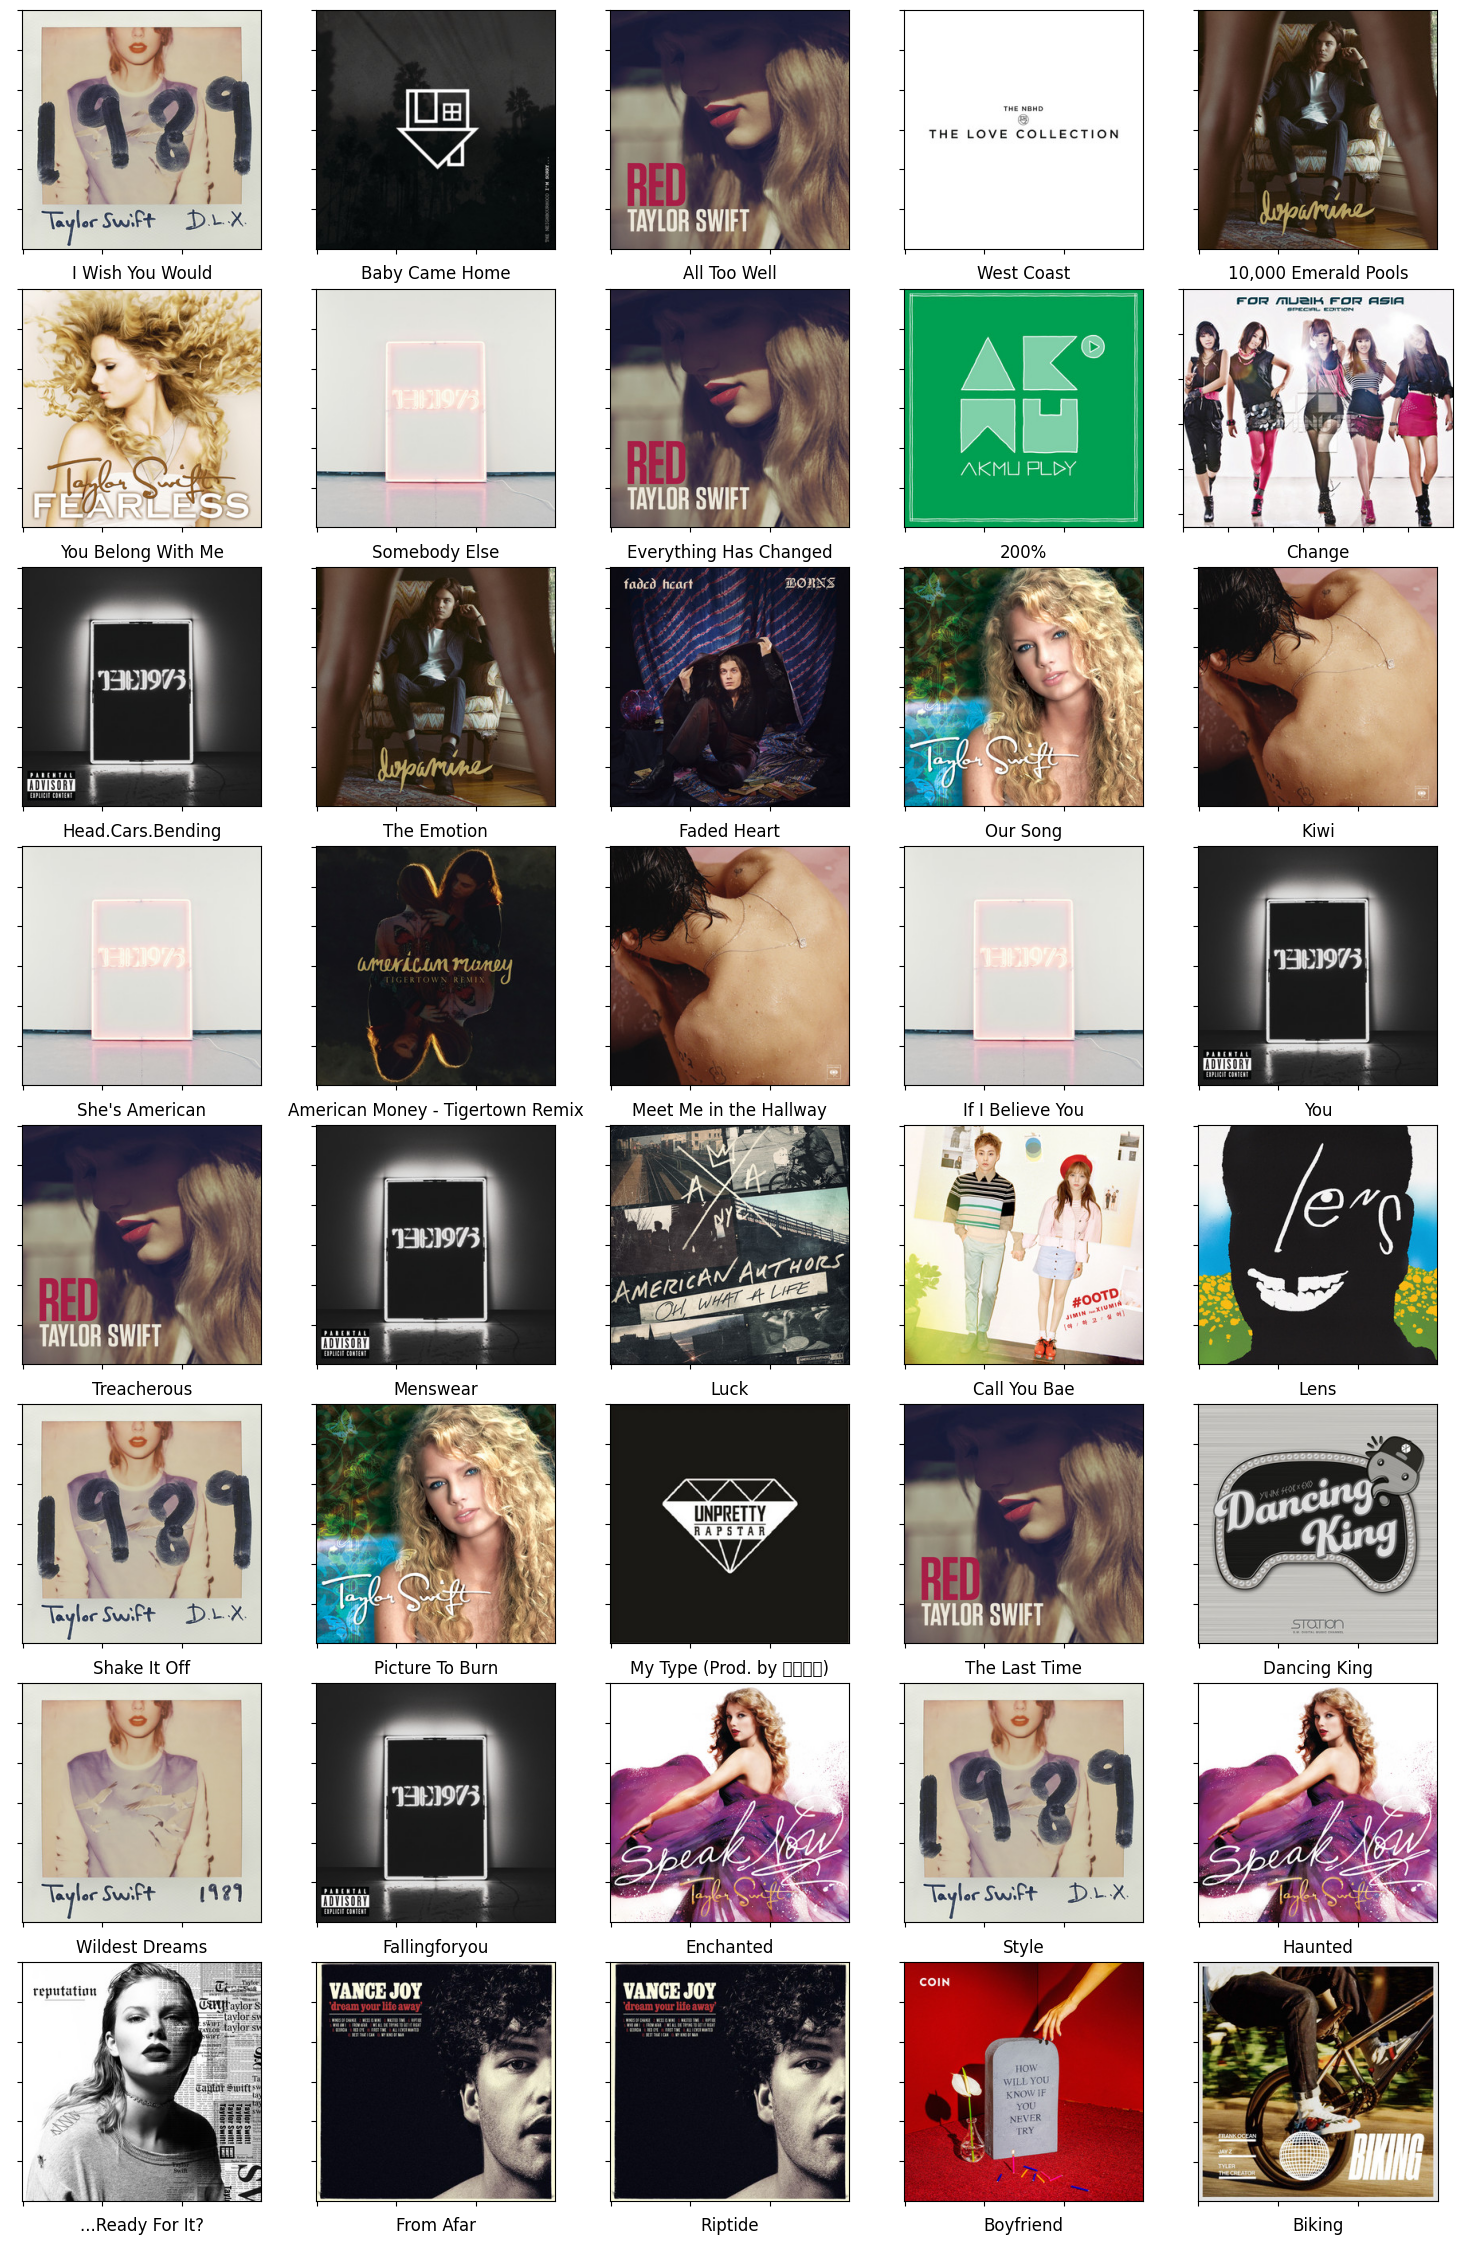

In [ ]:
visualize_songs(my_top_40)